In [ ]:
베이즈 분류기 구현

In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

viagra_spam = {'viagra':
[1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1],
'spam':
[1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1]}

df=pd.DataFrame(viagra_spam,columns=['viagra','spam'])
np_data=df.values

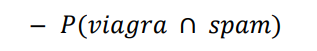

In [4]:
sum((np_data[:,0]==1)&(np_data[:,1]==1))/20

0.15

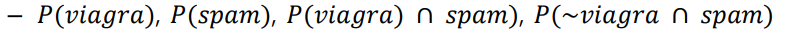

In [8]:
p_viagra=sum(np_data[:,0]==1)/len(np_data)
p_viagra

0.3

In [10]:
p_spam=sum(np_data[:,1]==1)/len(np_data)
p_spam

0.3

In [12]:
p_v_cap_s=sum((np_data[:,0]==1)&(np_data[:,1]==1))/len(np_data)
p_v_cap_s

0.15

In [14]:
p_n_v_cap_s=sum((np_data[:,0]==0)&(np_data[:,1]==1))/len(np_data)
p_n_v_cap_s

0.15

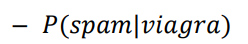

In [15]:
p_spam*(p_v_cap_s/p_spam)/p_viagra

0.5

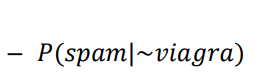

In [16]:
p_spam*(p_n_v_cap_s/p_spam)/(1-p_viagra)

0.2142857142857143

나이브 베이지안 분류기 만들기
– 나이브 베이지안 분류기(Naive Bayesian Classifier) : 여러 개의열을 사용하여 분류기를 구성

In [21]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

data_url = "c:/source/ch/fraud.csv"
df=pd.read_csv(data_url,sep=',')
df.head()

,ID,History,CoApplicant,Accommodation,Fraud
0,1,current,none,own,True
1,2,paid,none,own,False
2,3,paid,none,own,False
3,4,paid,guarantor,rent,True
4,5,arrears,none,own,False


Y 값을 따로 빼내고 X 데이터들을 원핫인코딩으로 처리

In [22]:
del df["ID"]
Y_data=df.pop("Fraud")
Y_data=Y_data.values
x_df=pd.get_dummies(df)
x_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
History_arrears,0,0,0,0,1,1,0,1,0,0
History_current,1,0,0,0,0,0,1,0,1,0
History_none,0,0,0,0,0,0,0,0,0,1
History_paid,0,1,1,1,0,0,0,0,0,0
CoApplicant_coapplicant,0,0,0,0,0,0,0,0,0,0
CoApplicant_guarantor,0,0,0,1,0,0,0,0,0,0
CoApplicant_none,1,1,1,0,1,1,1,1,1,1
Accommodation_free,0,0,0,0,0,0,0,0,0,0
Accommodation_own,1,1,1,0,1,1,1,1,0,1
Accommodation_rent,0,0,0,1,0,0,0,0,1,0


In [23]:
x_data=x_df.values
x_data

array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0]], dtype=uint8)

Y 값이 True인 경우와 False인 경우

In [25]:
P_Y_True=sum(Y_data==True)/len(Y_data)
P_Y_False=1-P_Y_True

P_Y_True,P_Y_False

(0.3, 0.7)

– 𝑃(𝑌𝑇𝑟𝑢𝑒)와 𝑃(𝑌𝐹𝑎𝑙𝑠𝑒)의 인덱스 값 정리

In [26]:
np.where(Y_data)

(array([ 0,  3,  5,  9, 11, 12], dtype=int64),)

In [29]:
ix_Y_True=np.where(Y_data)
ix_Y_False=np.where(Y_data==False)

ix_Y_True,ix_Y_False

((array([ 0,  3,  5,  9, 11, 12], dtype=int64),),
 (array([ 1,  2,  4,  6,  7,  8, 10, 13, 14, 15, 16, 17, 18, 19],
        dtype=int64),))

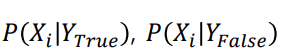

In [31]:
p_x_y_true=(x_data[ix_Y_True].sum(axis=0))/sum(Y_data==True)
p_x_y_false=(x_data[ix_Y_False].sum(axis=0))/sum(Y_data==False)

p_x_y_true,p_x_y_false

(array([0.16666667, 0.5       , 0.16666667, 0.16666667, 0.        ,
        0.16666667, 0.83333333, 0.        , 0.66666667, 0.33333333]),
 array([0.42857143, 0.28571429, 0.        , 0.28571429, 0.14285714,
        0.        , 0.85714286, 0.07142857, 0.78571429, 0.14285714]))

In [32]:
x_test=[0,1,0,0,0,1,0, 0,1,0]

p_y_true_test=P_Y_True+p_x_y_true.dot(x_test)
p_y_false_test=P_Y_False+p_x_y_false.dot(x_test)

p_y_true_test,p_y_false_test

(1.6333333333333333, 1.7714285714285714)

In [33]:
p_y_true_test<p_y_false_test

True

. 사이킷런을 활용한 나이브 베이지안 분류기
– 하나의 문장이 있을 때 이 문장을 sports와 not sports로 나누는 분류기 만들기
• 사이킷런의 클래스를 사용

In [34]:
y_example_text=["Sports", "Not sports", "Sports", "Sports", "Not sports"]

y_example=[1 if c=="Sports" else 0 for c in y_example_text]

text_example = ["A great game game",
"The The election was over",
"Very clean game match",
"A clean but forgettable game game",
"It was a close election", ]

– BoW(Bag of Words) : 단어별로 인덱스가 부여되어 있을 때 한문장 또는 한 문서에 대한 벡터를 표현하는 기법
• 하나의 단어를 벡터화시킬 때는 원핫인코딩 기법을 사용
• 전체 문서에 있는 모든 단어들에 이미 인덱스가 부여되어 있고 출현한 단어에 대해서만 단어의 개수를 벡터로 표현

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

countvect_example=CountVectorizer()
X_example=countvect_example.fit_transform(text_example)
countvect_example.get_feature_names()

['but',
 'clean',
 'close',
 'election',
 'forgettable',
 'game',
 'great',
 'it',
 'match',
 'over',
 'the',
 'very',
 'was']

In [38]:
countvect_example.transform(text_example).toarray()

array([[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [39]:
countvect_example.vocabulary_

{'great': 6,
 'game': 5,
 'the': 10,
 'election': 3,
 'was': 12,
 'over': 9,
 'very': 11,
 'clean': 1,
 'match': 8,
 'but': 0,
 'forgettable': 4,
 'it': 7,
 'close': 2}

2.1 베르누이 나이브 베이지안 분류기
• 베르누이 나이브 베이지안 분류기(BernoulliNB) : 다루고자 하는 모든 데이터가 불린 피쳐
• 사용되는 데이터 타입은 이산형 데이터인데, 이러한 데이터를 모두불린 타입으로 변경하여 학습
• 정수 타입 숫자라면 임계값 기준으로 True 또는 False로 변환

In [42]:
from sklearn.naive_bayes import BernoulliNB

clf=BernoulliNB(alpha=1,binarize=0)
clf.fit(X_example,y_example)

pred=clf.predict(X_example)
pred

array([1, 0, 1, 1, 0])

2.2 다항 나이브 베이지안 분류기
• 다항 나이브 베이지안 분류기(MultinomialNB) : 베르누이 분류기와
달리 각 피쳐들이 이산형이지만, 이진값이 아닌 여러 개의 값을 가질 수 있다

In [43]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=1)
clf.fit(X_example,y_example)
pred=clf.predict(X_example)
pred

array([1, 0, 1, 1, 0])

– 2.3 가우시안 나이브 베이지안 분류기
• 가우시안 나이브 베이지안 분류기(GaussianNB) : 연속형 값을 피쳐로 가진 데이터의 확률을 구하기 위해 𝑦의 분포를 정규분포(gaussian)로 가정
• 확률밀도 함수 상의 해당 값 𝑥가 나올 확률로 나이브 베이지안(NB)을 구현

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_example.toarray(), y_example)
pred = clf.predict(X_example)
pred


1. 20newsgroup 데이터셋 소개
– 20개의 뉴스 텍스트 데이터를 주제별로 분류하는 문제
– 사이킷런에서 제공하는 20newsgroup 데이터셋과 나이브 베이지안 분류기를 사용
– 모듈을 호출하고 20newsgroup 데이터셋을 다운로드

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [48]:
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset='all')
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

딕셔너리 타입(dict type)의 의미
일반적으로 모듈에서 제공되는 데이터셋은 모두 비슷한 형태의 딕셔너리타입을 제공한다. 출력된 결과값의 의미는 다음과 같다.
• data : 실제 데이터
• filenames : 다운로드된 데이터의 파일 위치
• target_names : 데이터 y 값의 이름
• target : 데이터 y 값의 인덱스
• DESCR : 데이터에 대한 설명

In [49]:
print(news.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




y 값은 target과 target_names

In [50]:
news.target

array([10,  3, 17, ...,  3,  1,  7])

In [51]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

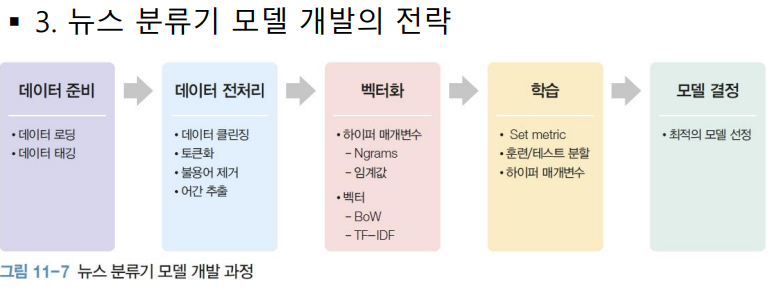

– 벡터화 : BoW를 생성하는 CountVectorizer를 약간 변형한 TFidfVectorizer를 생성하여 텍스트를 벡터화
– 교차 검증 : 모델 성능을 여러 번 측정하여 평균치를 측정
– 파이프라인 : 데이터 전처리부터 성능 측정까지 연결된 코드로 나타냄

4. 데이터 전처리

In [52]:
news_df=pd.DataFrame({'News':news.data,'Target':news.target})
news_df.head()

,News,Target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


In [53]:
target_dict={idx:name for idx, name in enumerate(news.target_names)}
news_df["Target"]=news_df["Target"].replace(target_dict)

In [54]:
def data_cleansing(df):
    delete_email = re.sub(r'\b[\w\+]+@[\w]+.[\w]+.[\w]+.[\w]+\b', ' ', df)
    delete_number = re.sub(r'\b|\d+|\b', ' ', delete_email)
    delete_non_word = re.sub(r'\b[\W]+\b', ' ', delete_number)
    cleaning_result =' '.join(delete_non_word.split())
    return cleaning_result

news_df.loc[:,'News']=news_df['News'].apply(data_cleansing)
news_df.head()

,News,Target
0,From Mamatha Devineni Ratnam Subject Pens fans...,rec.sport.hockey
1,From Matthew B Lawson Subject Which high perfo...,comp.sys.ibm.pc.hardware
2,From hilmi Hilmi Eren Subject Re ARMENIA SAYS ...,talk.politics.mideast
3,From Guy Dawson Subject Re IDE vs SCSI DMA and...,comp.sys.ibm.pc.hardware
4,From Alexander Samuel McDiarmid Subject driver...,comp.sys.mac.hardware


5. 벡터화하기
– BoW에 해당하는 CountVectorizer 외의 벡터화 기법들
– tfidf : 전체 문서에서 많이 나오는 단어의 중요도는 줄이고 해당 문서에만 많이 나오는 단어의 중요도를 올리는 기법
• TF(Term Frequency) : 문서에서 해당 단어가 얼마나 나왔는지 나타내주는 빈도 수
• DF(Document Frequency) : 해당 단어가 있는 문서의 수
• IDF(Inverse Document Frequency) : 해당 단어가 있는 문서의 수가 높아질수록 가중치를 축소하기 위해 역수를 취함
• N : 전체 문서의 개수
• 𝑡𝑓𝑖,𝑗 : 𝑗번째 문서에 𝑖번째 단어가 존재하는 개수
• 𝑑𝑓𝑖 : 𝑖번째 단어가 있는 문서의 개수
• 여러 문서에서 단어가 많이 나오면 밑 수식에서 로그 값이 작아지면서 중요도를 떨어뜨림
• 사이킷런에서는 TfidfVectorizer 클래스 사용

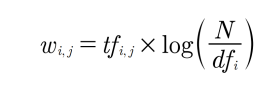

– 토큰(token) : 인덱스를 지정해야 하는 단어들의 리스트를 정리하는 기법
• 어간 추출(stemming) : 띄어쓰기 기준이 아닌 의미나 역할이 다른 단어들을 기준으로 분리
• 문법적 기준을 기반으로 어근이나 어미를 토큰으로 사용

In [55]:
!pip install nltk

In [56]:
from nltk import stem
stmmer=stem.SnowballStemmer("english")
sentence='looking looks looked'
[stmmer.stem(word) for word in sentence.split()]

['look', 'look', 'look']

In [57]:
stmmer.stem("images"),stmmer.stem("imaging"),stmmer.stem("imagination")

('imag', 'imag', 'imagin')

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

enlish_stemmer = nltk.stem.SnowballStemmer("english")
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer,self).build_analyzer()
        return lambda doc: (enlish_stemmer.stem(w) for w in analyzer(doc))
from sklearn.feature_extraction.text import TfidfVectorizer

enlish_stemmer = nltk.stem.SnowballStemmer("english")
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer,self).build_analyzer()
        return lambda doc: (enlish_stemmer.stem(w) for w in analyzer(doc))

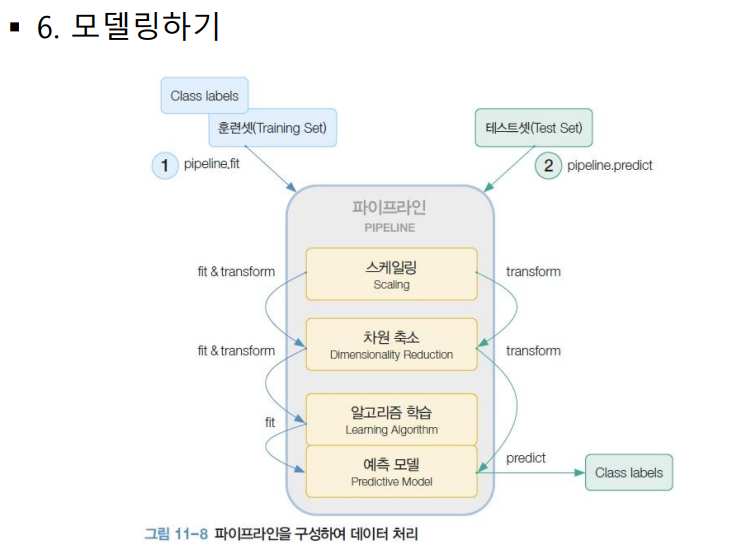

6. 모델링하기
– 경우의 수 생성하고 학습 파이프라인에 넣어 학습 수행

In [68]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

vectorizer = [CountVectorizer(), TfidfVectorizer(),
StemmedCountVectorizer(), StemmedTfidfVectorizer()]
# algorithms = [BernoulliNB(), MultinomialNB(), GaussianNB(), LogisticRegression()]
algorithms = [MultinomialNB(), LogisticRegression()]
pipelines = []

In [69]:
import itertools
for case in list(itertools.product(vectorizer,algorithms)):
    pipelines.append(make_pipeline(*case))

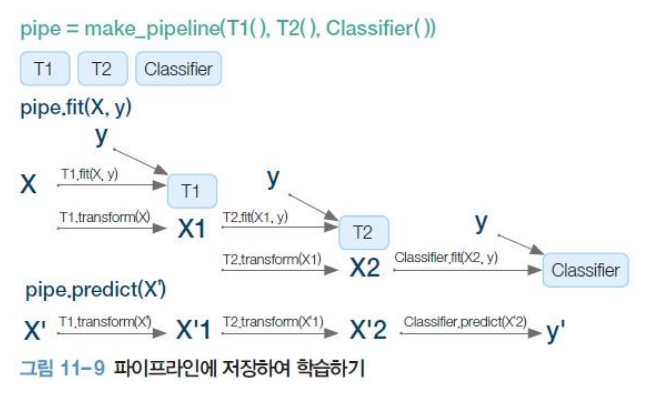

In [71]:
ngrams_params=[(1,1),(1,3)]
stopword_params=["english"]
lowercase_params=[True,False]
max_df_params=np.linspace(0.4,0.6,num=6)
min_df_params=np.linspace(0.0,0.0,num=1)

attributes={"ngram_range":ngrams_params,
           "max_df":max_df_params,"min_df":min_df_params,
           "lowercase":lowercase_params,"stop_words":stopword_params}
vectorizer_names=["countvectorizer","tfidvectorizer",
                 "stemmedcount vectorizer","stemmedtfidvectorizer"]
vectorizer_params_dict={}

for vect_name in vectorizer_names:
    vectorizer_params_dict[vect_name]={}
    for key,value in attributes.items():
        param_name=vect_name+ "__" + key
        vectorizer_params_dict[vect_name][param_name]=value

In [72]:
algorithm_names=["multinomialnb","logisticregression"]

algorithm_params_dict={}
alpha_params=np.linspace(1.0,1.0,num=1)
for i in range(1):
    algorithm_params_dict[algorithm_names[i]]={
        algorithm_names[i]+"__alpha":alpha_params
    }
c_params=[0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]

algorithm_params_dict[algorithm_names[1]] = [{
    "logisticregression__multi_class" : ["multinomial"],
    "logisticregression__solver" : ["saga"],
    "logisticregression__penalty" : ["l1"],
    "logisticregression__C" : c_params
    },{
    "logisticregression__multi_class" : ["ovr"],
    "logisticregression__solver" : ['liblinear'],
    "logisticregression__penalty" : ["l2"],
    "logisticregression__C" : c_params
    }
]


In [73]:
pipeline_params=[]
for case in list(itertools.product(vectorizer_names,algorithm_names)):
    vect_params=vectorizer_params_dict[case[0]].copy()
    algo_params=algorithm_params_dict[case[1]]
    
    if isinstance(algo_params,dict):
        vect_params.update(algo_params)
        pipeline_params.append(vect_params)
    else:
        temp=[]
        for param in algo_params:
            vect_params.update(param)
            temp.append(vect_params)
        pipeline_params.append(temp)

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_data = news_df.loc[:, 'News'].tolist()
y_data = news_df['Target'].tolist()
y = LabelEncoder().fit_transform(y_data)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(pipelines,pipeline_params)):
n_jobs = -1
gs_estimator = GridSearchCV(refit="accuracy",
estimator=estimator,param_grid=params,
scoring=scoring, cv=5, verbose=1,
n_jobs=n_jobs)
print(gs_estimator)
gs_estimator.fit(X_data, y)
estimator_results.append(gs_estimator)